## Notebook showing a general workflow for the postprocessing analysis for the satay pipeline 

In [1]:

import os, sys
import warnings
import timeit
import numpy as np
import pysam
import pandas as pd 




In [2]:
from transposonmapper.processing.clean_bedwigfiles import cleanfiles
from transposonmapper.processing.transposonread_profileplot_genome import profile_genome
from transposonmapper.processing.genomicfeatures_dataframe import dna_features
from transposonmapper.statistics import volcano

# importing the transposon mapping function

from transposonmapper  import transposonmapper


# importing the transposon mapping function



In [5]:

#bamfile= '../transposonmapper/data_files/files4test/SRR062634.filt_trimmed.sorted.bam'
bamfile='../transposonmapper/data_files/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam'
#filename='SRR062634.filt_trimmed.sorted.bam'
assert os.path.isfile(bamfile), "Not a file or directoy"

transposonmapper(bamfile=bamfile) 

Getting coordinates of all genes ...
Getting reads for chromosome ref|NC_001133| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7f7a01e88e40> completed in 21.708 seconds

Getting reads for chromosome ref|NC_001134| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7f7a01e88eb0> completed in 77.246 seconds

Getting reads for chromosome ref|NC_001135| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7f7a01f2a040> completed in 34.427 seconds

Getting reads for chromosome ref|NC_001136| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7f7a01f2a120> completed in 69.672 seconds

Getting reads for chromosome ref|NC_001137| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7f7a01f2a0b0> completed in 43.638 seconds

Getting reads for chromosome ref|NC_001138| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7f7a01f2a350> completed in 28.298 seconds

Getting reads for chr

In [3]:
wig_files=[]
bed_files=[]
pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("sorted.bam.wig"):
            wig_files.append(os.path.join(root, file))
        elif file.endswith("sorted.bam.bed"):
             bed_files.append(os.path.join(root, file))
        elif file.endswith('sorted.bam_pergene_insertions.txt'):
            pergene_files.append(os.path.join(root, file))






### Clean the wig and bed files generated by transposon mapper (it is ok if run in spyder)

In [7]:
## clean wig files for proper visualization in the genome Browser http://genome-euro.ucsc.edu/cgi-bin/hgGateway
custom_header = ""
split_chromosomes = False
for files in zip(wig_files,bed_files):
    cleanfiles(filepath=files[0], custom_header=custom_header, split_chromosomes=split_chromosomes)
    cleanfiles(filepath=files[1], custom_header=custom_header, split_chromosomes=split_chromosomes)


Wig file loaded ../transposonmapper/data_files/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam.wig
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
Line removed: 1531934 14

evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XIII
evaluating chromosome XIV
evaluating chromosome XV
evaluating chromosome XVI
Bed file loaded ../transposonmapper/data_files/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam.bed
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
Line removed: chrref|NC_001136| 1531934 1531935 . 380

evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome

In [8]:
cleanbed_files=[]
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("clean.bed"):
            cleanbed_files.append(os.path.join(root, file))

cleanwig_files=[]
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("clean.wig"):
            cleanwig_files.append(os.path.join(root, file))

Genome length:  12071326
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt


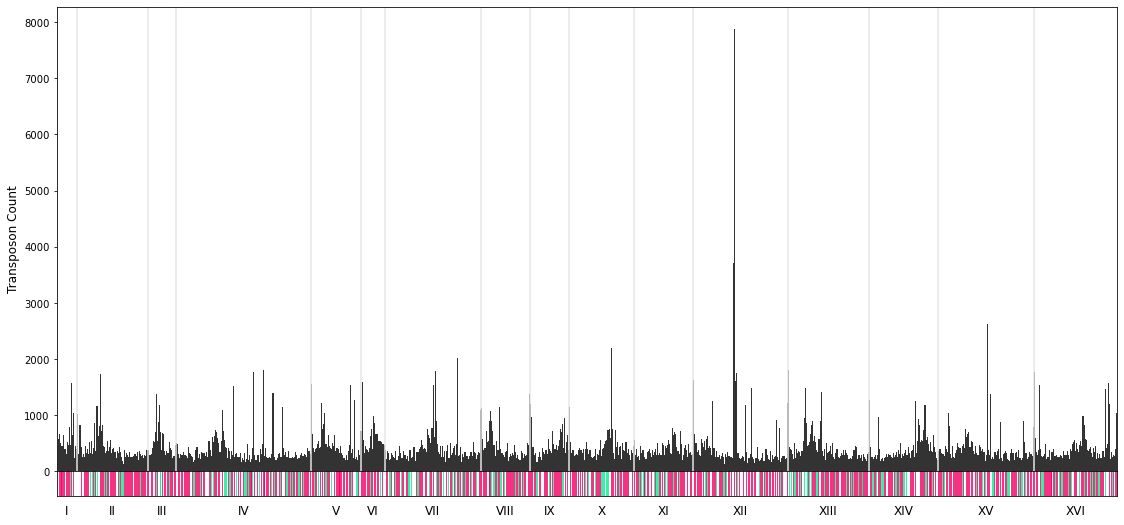

In [9]:
#transposonread_profileplot_genome.py (to check the insertion and read distribution throughout the genome)
#example of file to analyse with profile_genome
bed_file=cleanbed_files[0]
variable="transposons" #"reads" "transposons"
bar_width=None
savefig=False

profile=profile_genome(bed_file=bed_file, variable=variable, bar_width=bar_width, savefig=savefig,showfig=True)



Selected region:  I
Chromosome length =  230218
Everything alright, just ignore me!


,Feature_name,Standard_name,Feature_alias,Feature_type,Essentiality,Chromosome,Position,Nbasepairs,Ninsertions,Ninsertions_truncatedgene,Nreads,Nreads_list,Nreads_truncatedgene,Nreadsperinsrt,Nreadsperinsrt_truncatedgene
0,noncoding,noncoding,,None,None,I,"[0, 1]",2,0,0,0,[0.0],0,0.000000,0.000000
1,TEL01L,TEL01L,,Telomere,None,I,"[2, 335]",334,23,23,2583,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2583,117.409091,112.304348
2,YAL069W,YAL069W,,Gene; Dubious,False,I,"[336, 650]",315,24,12,967,"[141.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0...",572,42.043478,47.666667
3,TEL01L,TEL01L,,Telomere,None,I,"[651, 707]",57,2,2,134,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",134,0.000000,0.000000
4,ARS102,ARS102,,ARS,None,I,"[708, 776]",69,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,YAR071W,PHO11,,Gene; Verified,False,I,"[225461, 226864]",1404,36,34,1699,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1543,48.542857,45.382353
238,noncoding,noncoding,,None,None,I,"[226865, 227742]",878,2,2,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",20,0.000000,0.000000
239,YAR073W,IMD1,,Gene; Dubious,False,I,"[227743, 228844]",1102,13,12,458,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",449,38.166667,37.416667
240,YAR075W,YAR075W,,Gene; Dubious,False,I,"[228845, 229318]",474,3,3,81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",81,0.000000,0.000000


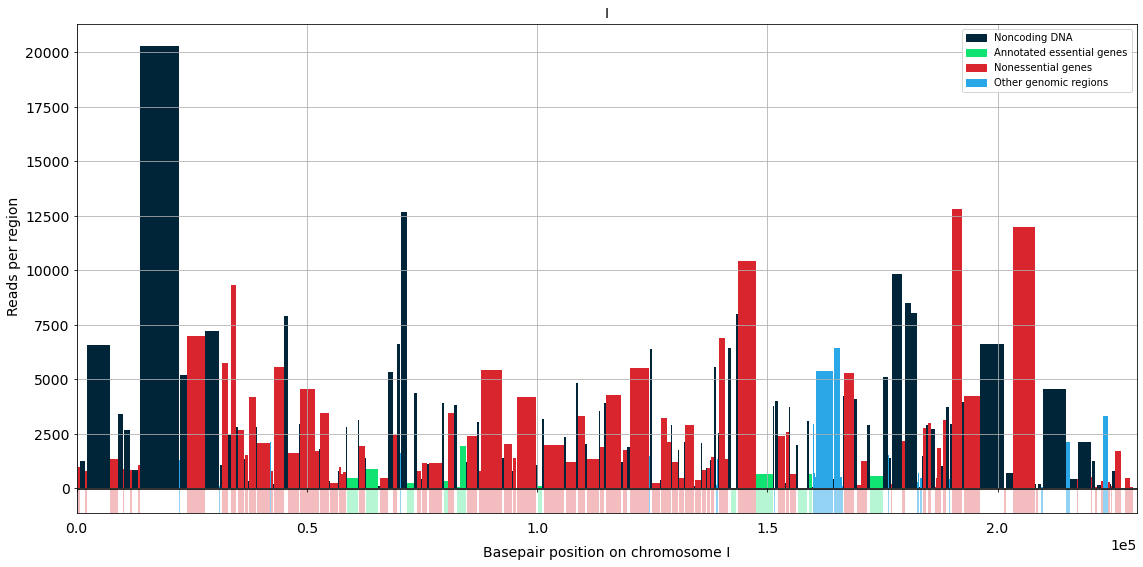

In [10]:
# genomic features 
i=0
wig_file = cleanwig_files[i]
pergene_insertions_file = pergene_files[i]
plotting=True
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

   
region = "I" #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
dna_features(region=region,
                wig_file=wig_file,
                pergene_insertions_file=pergene_insertions_file,
                variable=variable,
                plotting=plotting,
                savefigure=savefigure,
                verbose=verbose)


In [10]:
# genomic features 
i=0
wig_file = cleanwig_files[i]
pergene_insertions_file = pergene_files[i]
plotting=False
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

dna_df2=[]
for chrom in ['I', 'II', 'III', 'IV','V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI']:
#     region=chrom
   
    region = chrom #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
    dna_df2.append(dna_features(region=region,
                 wig_file=wig_file,
                 pergene_insertions_file=pergene_insertions_file,
                 variable=variable,
                 plotting=plotting,
                 savefigure=savefigure,
                 verbose=verbose))
data_genome=pd.concat(dna_df2, axis=0,ignore_index=True)

Selected region:  I
Chromosome length =  230218
Everything alright, just ignore me!
Selected region:  II
Chromosome length =  813184
Everything alright, just ignore me!
Selected region:  III
Chromosome length =  316620
Everything alright, just ignore me!
Selected region:  IV
Chromosome length =  1531933
Everything alright, just ignore me!
Selected region:  VI
Chromosome length =  270161
Everything alright, just ignore me!


IndexError: list assignment index out of range

In [ ]:
plotting=False
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

dna_df2=[]
data_genome=[]
for files_wig,files_pergene in zip(cleanwig_files,pergene_files):
    
    for chrom in ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI']:
#     region=chrom
   
        region = chrom #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
        dna_df2.append(dna_features(region=region,
                    wig_file=files_wig,
                    pergene_insertions_file=files_pergene,
                    variable=variable,
                    plotting=plotting,
                    savefigure=savefigure,
                    verbose=verbose))
    data_genome.append(pd.concat(dna_df2, axis=0,ignore_index=True))

Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Plotting: read_per_gene


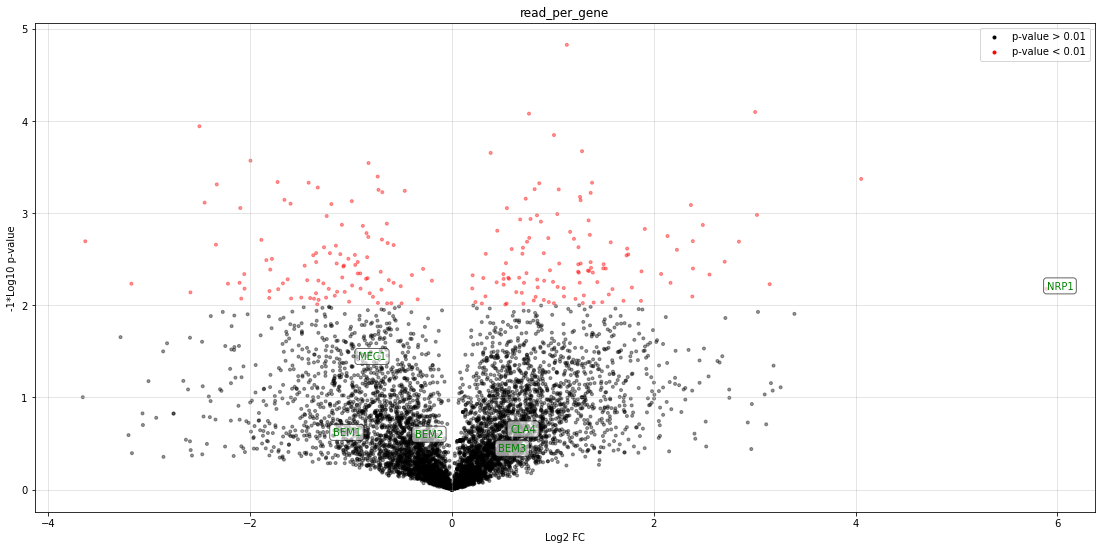

In [19]:
# volcano plots

path_a = r"../transposonmapper/data_files/files4test/"
filelist_a = ["WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "WT_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"]
path_b = r"../transposonmapper/data_files/files4test/"
filelist_b = ["dnrp1-1_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "dnrp1-1_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"]


variable = 'read_per_gene' #'read_per_gene' 'tn_per_gene', 'Nreadsperinsrt'
significance_threshold = 0.01 #set threshold above which p-values are regarded significant
normalize=True

trackgene_list = []
# trackgene_list = ['nrp1']
trackgene_list = [ 'bem1', 'bem2', 'bem3', 'nrp1',  'cla4', 'mec1']
# trackgene_list = ['ymr320w','sut1','ymr242w-a','ypl135c-a','ppn1','ypl067c','yme1','mec1','nrp1','mss18','tma7','gef1']

figure_title = ""

volcano_df = volcano(path_a=path_a, filelist_a=filelist_a,
            path_b=path_b, filelist_b=filelist_b,
            variable=variable,
            significance_threshold=significance_threshold,
            normalize=normalize,
            trackgene_list=trackgene_list,
            figure_title=figure_title)